# Principal Component Analysis with Cancer Data

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [3]:
cancer=pd.read_csv("breast-cancer-wisconsin.data.txt")

cancer.columns=["Sample_code_number","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]
#cancer.shape
cancer.head(10)

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [52]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
Sample_code_number             698 non-null int64
Clump_Thickness                698 non-null int64
Uniformity_of_Cell_Size        698 non-null int64
Uniformity_of_Cell_Shape       698 non-null int64
Marginal_Adhesion              698 non-null int64
Single_Epithelial_Cell_Size    698 non-null int64
Bare_Nuclei                    698 non-null object
Bland_Chromatin                698 non-null int64
Normal_Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [53]:
cancer.dtypes

Sample_code_number              int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [54]:
cancer.describe(include='all')

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698,698.000000,698.000000,698.000000,698.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,401,NaN,NaN,NaN,NaN
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,NaN,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,NaN,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [17]:
cancer.shape

(698, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [18]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
cancer.isna()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [19]:
cancer.isnull()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [55]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
cancer["Bare_Nuclei"].value_counts()
# substring to be searched 
# creating and passsing series to new column 


1     401
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [4]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
cancer["Bare_Nuclei"].mode()[0]
#Replacing the '?' with '1'
cancer["Bare_Nuclei"]= cancer["Bare_Nuclei"].replace("?",1) 
#COnverting the cloumn from Object to int
cancer["Bare_Nuclei"] = pd.to_numeric(cancer["Bare_Nuclei"])
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
Sample_code_number             698 non-null int64
Clump_Thickness                698 non-null int64
Uniformity_of_Cell_Size        698 non-null int64
Uniformity_of_Cell_Shape       698 non-null int64
Marginal_Adhesion              698 non-null int64
Single_Epithelial_Cell_Size    698 non-null int64
Bare_Nuclei                    698 non-null int64
Bland_Chromatin                698 non-null int64
Normal_Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [57]:
cancer["Bare_Nuclei"].value_counts()

1     417
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [58]:
# Check for correlation of variable
cancer.corr()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_code_number,1.000000,-0.055276,-0.041735,-0.041717,-0.065003,-0.045630,-0.092679,-0.060082,-0.052188,-0.034961,-0.080378
Clump_Thickness,-0.055276,1.000000,0.645366,0.655089,0.486699,0.522108,0.590430,0.558511,0.536176,0.350176,0.716509
Uniformity_of_Cell_Size,-0.041735,0.645366,1.000000,0.906814,0.705397,0.751674,0.686457,0.755824,0.722699,0.458548,0.817772
Uniformity_of_Cell_Shape,-0.041717,0.655089,0.906814,1.000000,0.682871,0.719524,0.707261,0.736066,0.719272,0.438756,0.818794
Marginal_Adhesion,-0.065003,0.486699,0.705397,0.682871,1.000000,0.599402,0.666765,0.666759,0.603132,0.417476,0.696605
Single_Epithelial_Cell_Size,-0.045630,0.522108,0.751674,0.719524,0.599402,1.000000,0.583484,0.616108,0.628704,0.478975,0.682618
Bare_Nuclei,-0.092679,0.590430,0.686457,0.707261,0.666765,0.583484,1.000000,0.674281,0.574524,0.342203,0.818839
Bland_Chromatin,-0.060082,0.558511,0.755824,0.736066,0.666759,0.616108,0.674281,1.000000,0.665914,0.344118,0.756732
Normal_Nucleoli,-0.052188,0.536176,0.722699,0.719272,0.603132,0.628704,0.574524,0.665914,1.000000,0.428185,0.712067
Mitoses,-0.034961,0.350176,0.458548,0.438756,0.417476,0.478975,0.342203,0.344118,0.428185,1.000000,0.423008


In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


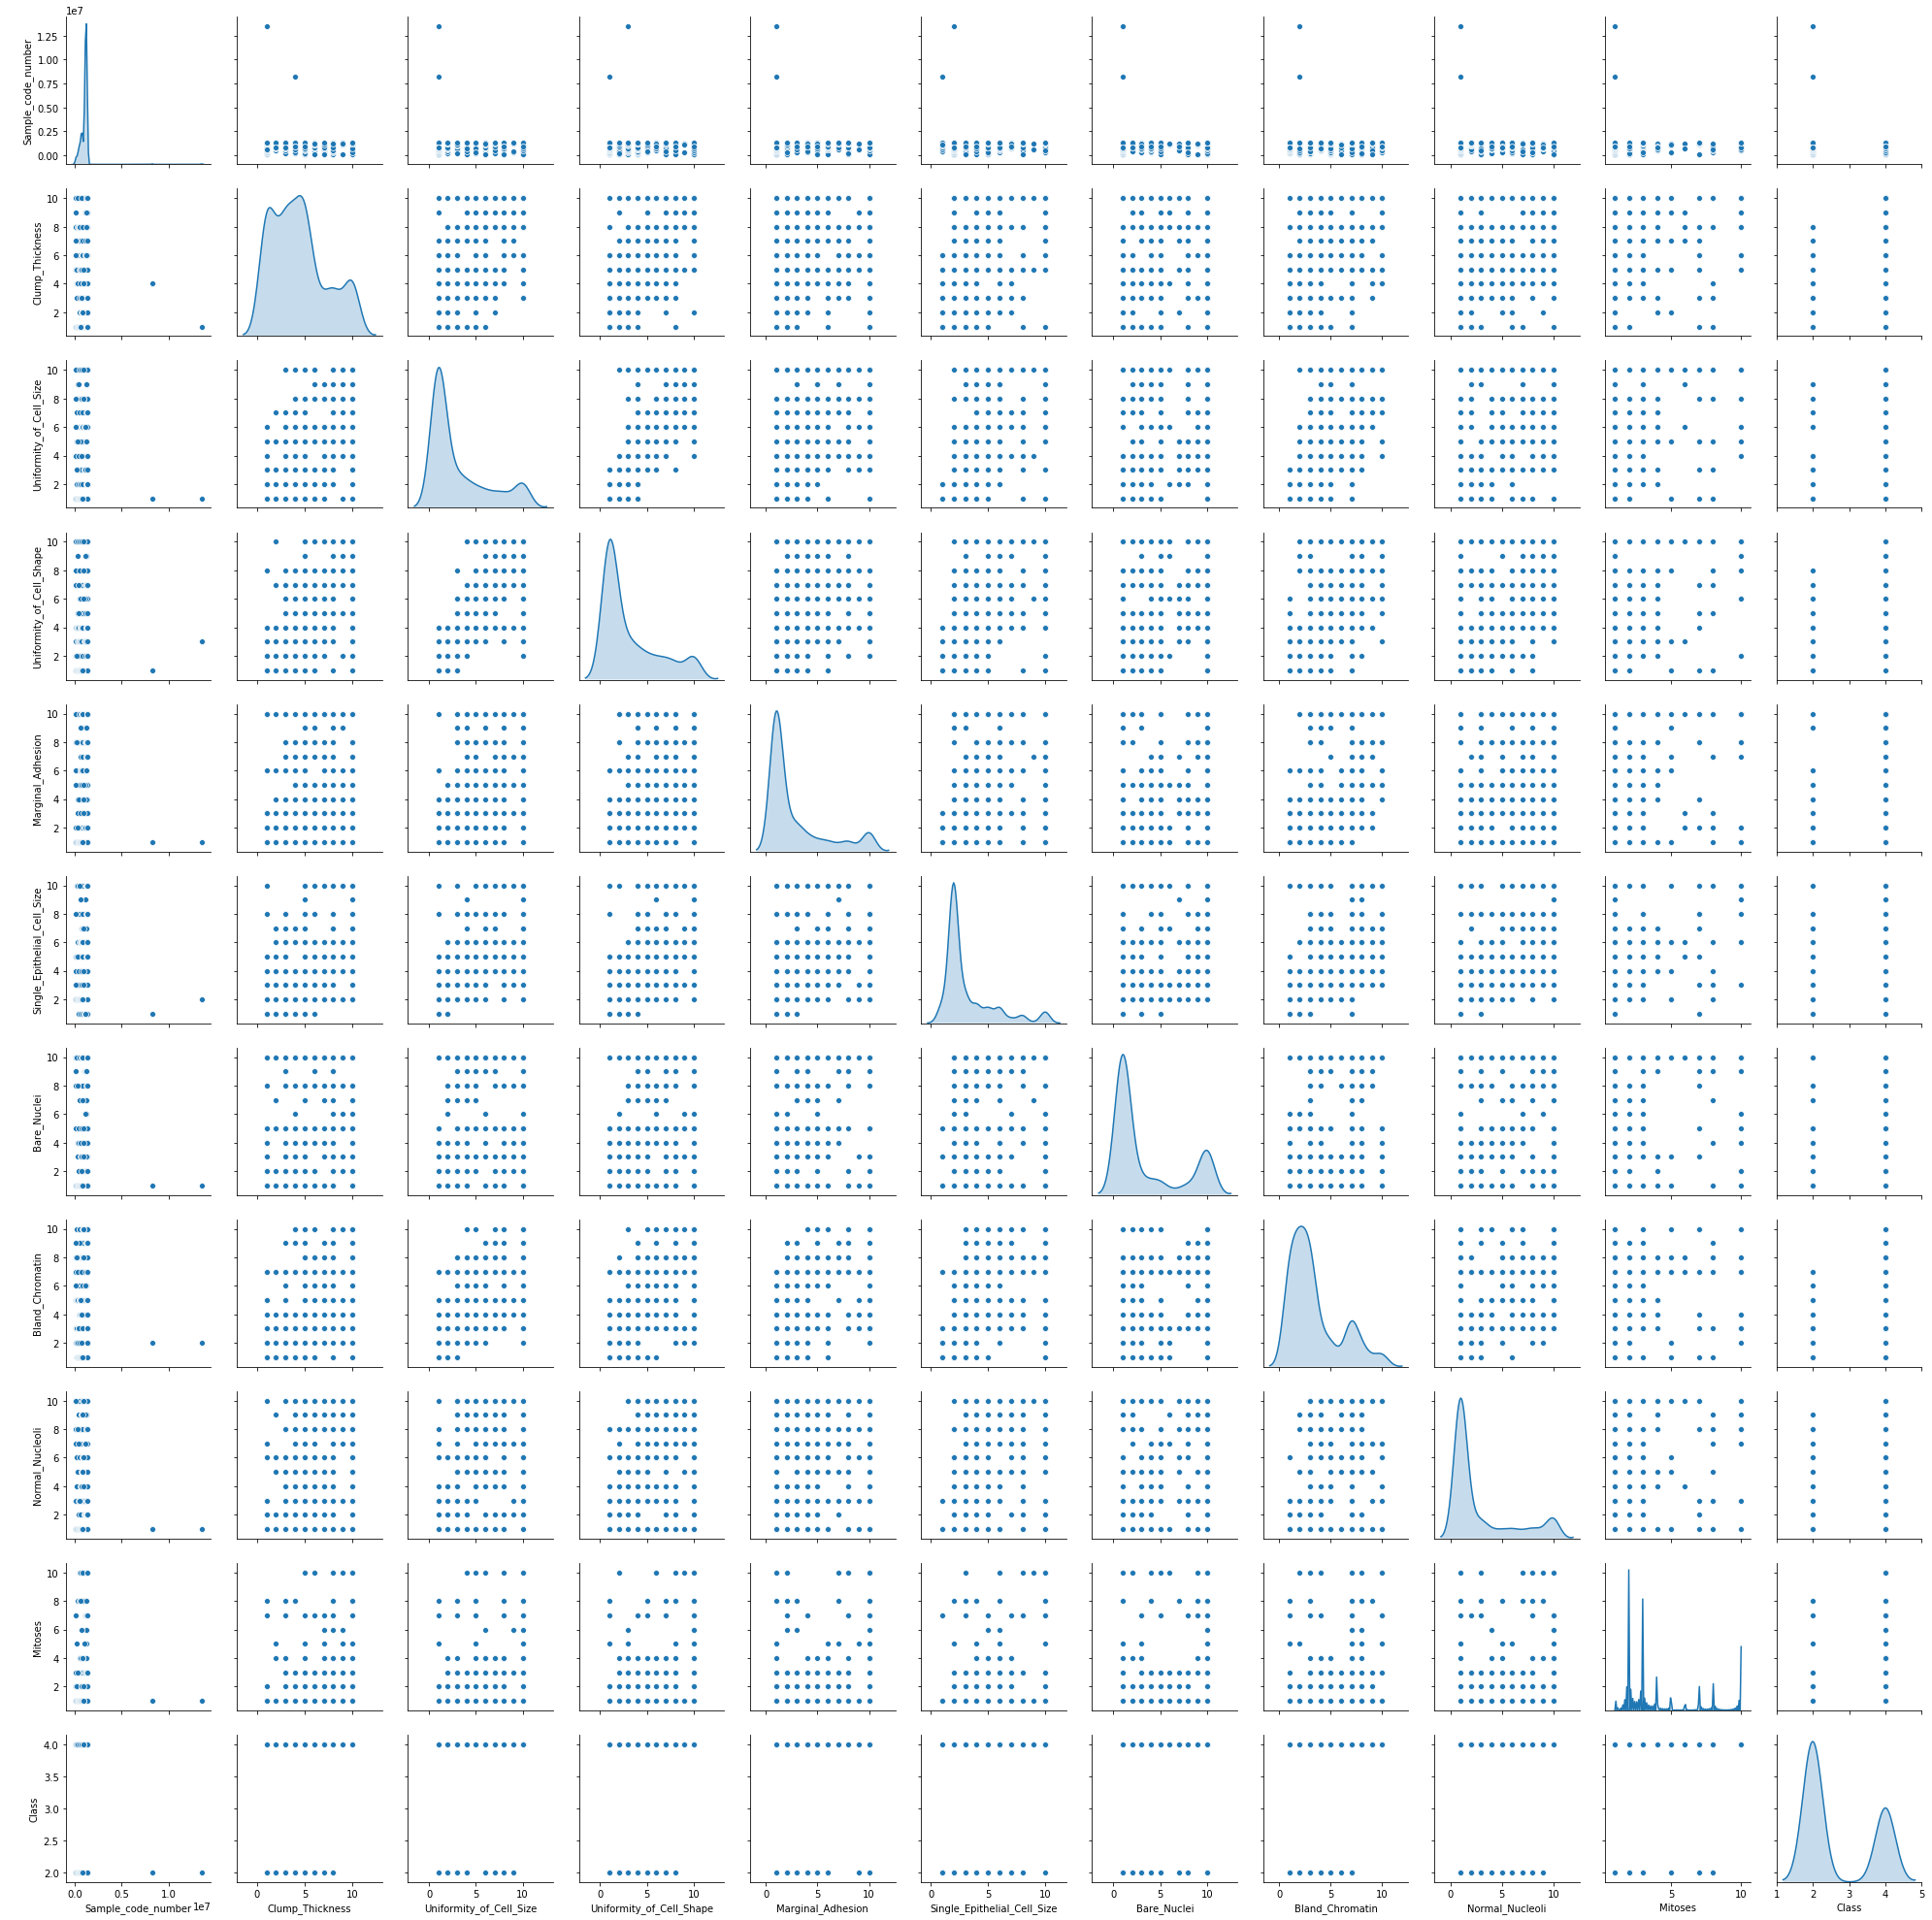

In [60]:
#Let us check for pair plots
sns.pairplot(cancer,diag_kind='kde')
plt.show()

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

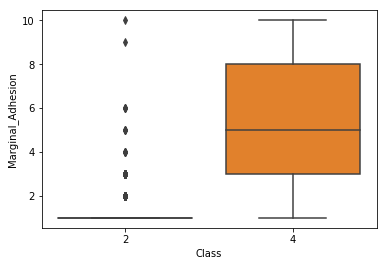

In [98]:
sns.boxplot(cancer['Class'],cancer['Marginal_Adhesion'])

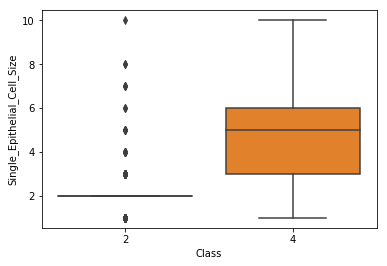

In [79]:
sns.boxplot(cancer['Class'],cancer['Single_Epithelial_Cell_Size'])

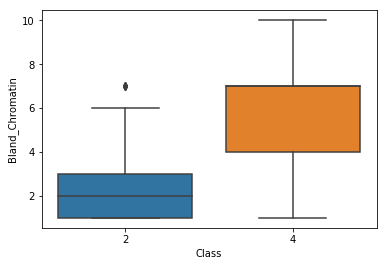

In [80]:
sns.boxplot(cancer['Class'],cancer['Bland_Chromatin'])

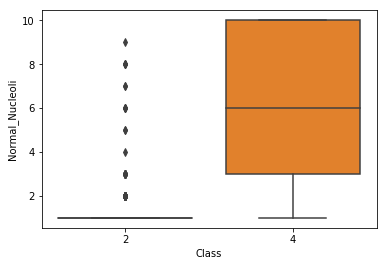

In [81]:
sns.boxplot(cancer['Class'],cancer['Normal_Nucleoli'])

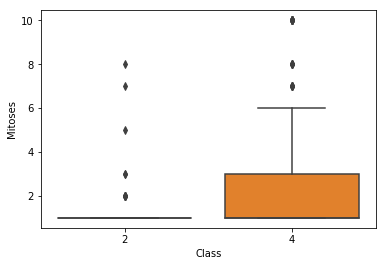

In [77]:
sns.boxplot(cancer['Class'],cancer['Mitoses'])

In [89]:
pd.crosstab(cancer['Mitoses'],cancer['Class'])

Class,2,4
Mitoses,,
1,444,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [5]:
cancer['Mitoses']=np.where(cancer['Mitoses']>=4,4,cancer['Mitoses'])
pd.crosstab(cancer['Mitoses'],cancer['Class'])

Class,2,4
Mitoses,,
1,444,134
2,8,27
3,2,31
4,3,49


In [91]:
pd.crosstab(cancer['Class'],cancer['Marginal_Adhesion'])

Marginal_Adhesion,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
2,374,37,31,5,4,4,0,0,1,1
4,32,21,27,28,19,18,13,25,4,54


In [6]:
cancer['Marginal_Adhesion']=np.where(cancer['Marginal_Adhesion']>=4,4,cancer['Marginal_Adhesion'])
pd.crosstab(cancer['Marginal_Adhesion'],cancer['Class'])

Class,2,4
Marginal_Adhesion,,
1,374,32
2,37,21
3,31,27
4,15,161


In [92]:
pd.crosstab(cancer['Class'],cancer['Single_Epithelial_Cell_Size'])

Single_Epithelial_Cell_Size,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
2,46,362,29,7,5,2,3,2,0,1
4,1,23,43,41,34,39,9,19,2,30


In [7]:
cancer['Single_Epithelial_Cell_Size']=np.where(cancer['Single_Epithelial_Cell_Size']>=4,4,cancer['Single_Epithelial_Cell_Size'])
pd.crosstab(cancer['Single_Epithelial_Cell_Size'],cancer['Class'])

Class,2,4
Single_Epithelial_Cell_Size,,
1,46,1
2,362,23
3,29,43
4,20,174


In [93]:
pd.crosstab(cancer['Class'],cancer['Normal_Nucleoli'])

Normal_Nucleoli,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
2,401,30,12,1,2,4,2,4,1,0
4,41,6,32,17,17,18,14,20,15,61


In [8]:
cancer['Normal_Nucleoli']=np.where(cancer['Normal_Nucleoli']>=4,4,cancer['Normal_Nucleoli'])
pd.crosstab(cancer['Normal_Nucleoli'],cancer['Class'])

Class,2,4
Normal_Nucleoli,,
1,401,41
2,30,6
3,12,32
4,14,162


In [0]:
# We could see most of the outliers are now removed.

In [9]:
from scipy.stats import zscore
cancer_z=cancer.apply(zscore)
cancer_z.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample_code_number,698.0,-9.241255e-17,1.000717,-1.636995,-0.326611,0.161894,0.269891,20.066036
Clump_Thickness,698.0,-4.676298e-16,1.000717,-1.213539,-0.858381,-0.148067,0.562247,1.982876
Uniformity_of_Cell_Size,698.0,2.099562e-17,1.000717,-0.700742,-0.700742,-0.700742,0.610566,2.249702
Uniformity_of_Cell_Shape,698.0,-4.211849e-16,1.000717,-0.744126,-0.744126,-0.744126,0.602342,2.285426
Marginal_Adhesion,698.0,-1.654200e-17,1.000717,-0.777485,-0.777485,-0.777485,1.541680,1.541680
Single_Epithelial_Cell_Size,698.0,9.972920e-16,1.000717,-1.648613,-0.612851,-0.612851,1.458674,1.458674
Bare_Nuclei,698.0,-2.249872e-16,1.000717,-0.687704,-0.687704,-0.687704,0.417054,1.798001
Bland_Chromatin,698.0,3.944632e-17,1.000717,-1.000036,-0.589915,-0.179795,0.640446,2.691048
Normal_Nucleoli,698.0,-1.253375e-16,1.000717,-0.716309,-0.716309,-0.716309,1.584229,1.584229
Mitoses,698.0,-9.261932e-16,1.000717,-0.418464,-0.418464,-0.418464,-0.418464,2.991123


In [10]:
caner_c=cancer.drop(columns='Class',axis=1)

In [11]:
caner_c.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,1002945,5,4,4,4,4,10,3,2,1
1,1015425,3,1,1,1,2,2,3,1,1
2,1016277,6,8,8,1,3,4,3,4,1
3,1017023,4,1,1,3,2,1,3,1,1
4,1017122,8,10,10,4,4,10,9,4,1


In [12]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(caner_c.T)
X_std

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 3.        ,  3.        ,  3.        , ...,  3.        ,
         3.        ,  3.        ],
       [-0.33333038, -0.33332896, -0.3333275 , ..., -0.333335  ,
        -0.33333663, -0.33333829],
       [-0.3333337 , -0.33333552, -0.33332094, ..., -0.33331625,
        -0.33332178, -0.33332343],
       ...,
       [-0.33333703, -0.33332896, -0.33333734, ..., -0.33332375,
        -0.33331435, -0.333316  ],
       [-0.33334035, -0.33333552, -0.33333406, ..., -0.33333875,
        -0.33333663, -0.33333829],
       [-0.33334367, -0.33333552, -0.3333439 , ..., -0.33334625,
        -0.33334778, -0.33334943]])

# Q6 Create a covariance matrix for identifying Principal components

In [2]:
# PCA
# Step 1 - Create covariance matrix


In [13]:
import numpy as np
cov=np.cov(X_std)
cov

array([[ 3.01464238e-18, -2.15060286e-14,  6.79993882e-15,
        -7.79061702e-16,  1.01617574e-14,  9.97642883e-15,
        -2.42398607e-14, -9.12807620e-15,  1.05572746e-14,
         1.81546129e-14],
       [-2.15060286e-14,  2.57671130e-10, -6.19099628e-11,
        -5.78049976e-12, -8.43153040e-11, -7.65574927e-11,
         1.40785066e-10,  3.95229269e-11, -7.04913365e-11,
        -1.38903021e-10],
       [ 6.79993882e-15, -6.19099628e-11,  1.39268216e-10,
         9.73958348e-11, -2.89929684e-11, -2.34734114e-11,
        -6.59050147e-11, -3.63630685e-11, -1.08307402e-11,
        -9.19568446e-12],
       [-7.79061702e-16, -5.78049976e-12,  9.73958348e-11,
         1.32122338e-10, -5.65571382e-11, -5.80425831e-11,
         1.04045293e-11, -7.45728595e-12, -5.38314104e-11,
        -5.82530056e-11],
       [ 1.01617574e-14, -8.43153040e-11, -2.89929684e-11,
        -5.65571382e-11,  7.75094191e-11,  6.35862478e-11,
        -9.60540162e-11, -2.85839235e-11,  5.69106666e-11,
         9.

# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [14]:
from numpy import linalg as LA
eig_vals, eig_vecs = np.linalg.eig(cov)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 5.51091672e-05 -2.08105862e-05 -1.62746974e-05  2.44500391e-05
   8.34513232e-06 -1.12059699e-05 -1.80192770e-05 -3.16227760e-01
   9.48683298e-01 -1.71932281e-07]
 [-4.29613744e-01  2.38497579e-01  7.85518838e-01  6.14833967e-02
   8.62379049e-02 -1.36355689e-01 -2.17870092e-02 -3.16227767e-01
  -1.05369956e-01  1.11144594e-02]
 [ 6.60077791e-02 -6.37778191e-01  4.23679586e-02  1.11883674e-01
  -4.59586330e-01 -5.01320743e-01 -2.77596262e-02 -3.16227767e-01
  -1.05431644e-01 -1.18508049e-02]
 [-1.05819503e-01 -6.02620256e-01  2.25501422e-02 -5.20935280e-02
   5.01165326e-01  5.03139917e-01  6.13957554e-02 -3.16227767e-01
  -1.05411906e-01 -5.68440457e-02]
 [ 2.59351724e-01  2.06902681e-01 -1.21768376e-01  3.77871516e-02
   2.33238907e-01 -1.87455866e-01 -3.21624153e-01 -3.16227767e-01
  -1.05433355e-01 -7.54701384e-01]
 [ 2.69885464e-01  1.96193459e-01 -1.12808013e-02 -1.34912396e-02
  -8.42540468e-02  3.53018917e-02  8.69869079e-01 -3.16227767e-01
  -1.05402813e-01 -

# Q8 Find variance and cumulative variance by each eigen vector

In [15]:
total=0
for i in eig_vals :
    total=total+i
print(total)

1.3551672525219535e-09


In [16]:
# Variance
import statistics
statistics.variance(eig_vals)

5.802724463934012e-20

In [17]:
total_v=eig_vals/total*100
total_v


array([5.64312827e+01, 2.22526906e+01, 1.17844851e+01, 3.88786201e+00,
       2.57308804e+00, 1.45414631e+00, 6.88356379e-01, 2.56660489e-15,
       3.93382254e-08, 9.28088762e-01])

In [18]:
np.cumsum(total_v)

array([ 56.43128273,  78.68397337,  90.46845846,  94.35632047,
        96.92940851,  98.38355482,  99.0719112 ,  99.0719112 ,
        99.07191124, 100.        ])

In [ ]:
# 90% variance is captured for 3rd component.

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(caner_c)

array([[-6.88617908e+04,  4.63520801e+00, -4.71944710e+00],
       [-5.63817908e+04, -3.87204326e+00, -6.56431687e-01],
       [-5.55297908e+04,  5.24431233e+00,  3.35130921e+00],
       ...,
       [-1.82986791e+05,  8.31311128e+00,  5.47557147e+00],
       [-1.74335791e+05,  6.38673241e+00,  2.45117393e+00],
       [-1.74335791e+05,  7.93468780e+00,  2.24404118e+00]])

In [30]:
pca.components_

array([[ 1.00000000e+00, -2.52214042e-07, -2.06303594e-07,
        -2.00829003e-07, -1.27287579e-07, -1.26657648e-07,
        -5.43785404e-07, -2.37403786e-07, -1.62233120e-07,
        -7.07210867e-08],
       [ 7.06246568e-07,  3.55335933e-01,  4.61318766e-01,
         4.50547997e-01,  1.67254258e-01,  1.29029086e-01,
         5.17830306e-01,  3.33761642e-01,  1.67329676e-01,
         7.59019166e-02],
       [-2.23157187e-07,  2.90970744e-01,  3.62969124e-01,
         3.00819765e-01, -3.00945211e-02,  2.01165534e-02,
        -8.28888834e-01,  4.96024134e-02,  4.20525609e-02,
         2.23838710e-02]])

# Q10 Find correlation between components and features

In [31]:
from sklearn import preprocessing
#data_scaled = pd.DataFrame(preprocessing.scale(caner_c),columns = caner_c.columns) 

print #pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2'])
df=pd.DataFrame(pca.components_,columns=caner_c.columns)


In [32]:
df

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,1.000000e+00,-2.522140e-07,-2.063036e-07,-2.008290e-07,-1.272876e-07,-1.266576e-07,-5.437854e-07,-2.374038e-07,-1.622331e-07,-7.072109e-08
1,7.062466e-07,3.553359e-01,4.613188e-01,4.505480e-01,1.672543e-01,1.290291e-01,5.178303e-01,3.337616e-01,1.673297e-01,7.590192e-02
2,-2.231572e-07,2.909707e-01,3.629691e-01,3.008198e-01,-3.009452e-02,2.011655e-02,-8.288888e-01,4.960241e-02,4.205256e-02,2.238387e-02


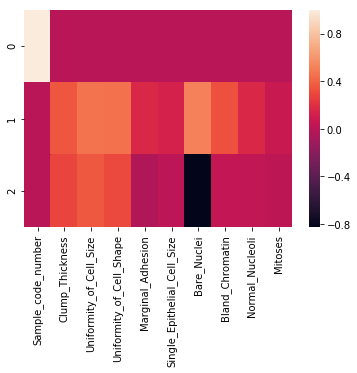

In [33]:
sns.heatmap(df)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [34]:
jo=pd.read_csv("jokes.csv")
jo.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [35]:
jo.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [37]:
df=jo.drop(columns="NumJokes", axis=1)
df.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [38]:
jo1=df.iloc[0:200]
jo1.shape

(200, 100)

In [40]:
ratings=jo1
ratings.shape

(200, 100)

In [41]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [47]:
ratings.columns=range(0,100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [54]:
#ratings.replace("99.00","0")
ratings.replace(to_replace=99.00,value=0,inplace=True)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ratings_fit=scaler.fit(ratings)
ratings_diff = scaler.transform(ratings)

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [71]:
mn=ratings_diff.mean(axis =0)
mn

array([ 0.00000000e+00,  1.77635684e-17, -2.88657986e-17, -1.33226763e-17,
       -2.22044605e-18, -6.66133815e-18,  6.66133815e-18,  1.66533454e-17,
       -5.32907052e-17,  8.88178420e-18, -3.55271368e-17, -4.44089210e-17,
       -8.88178420e-18,  3.55271368e-17, -8.88178420e-18, -1.19904087e-16,
        1.99840144e-17,  2.55351296e-17,  8.88178420e-18,  2.66453526e-17,
        1.11022302e-16, -1.77635684e-17, -2.66453526e-17,  4.44089210e-17,
       -1.33226763e-17, -5.32907052e-17, -1.77635684e-17,  8.88178420e-18,
        0.00000000e+00,  0.00000000e+00,  3.55271368e-17, -1.06581410e-16,
        4.44089210e-18,  4.44089210e-18, -8.88178420e-18,  1.77635684e-17,
        1.77635684e-17, -2.22044605e-17, -1.77635684e-17,  1.11022302e-17,
        0.00000000e+00,  1.33226763e-17,  3.10862447e-17, -2.66453526e-17,
        8.88178420e-18, -1.33226763e-17, -1.77635684e-17,  7.77156117e-17,
       -1.77635684e-17,  7.10542736e-17, -8.88178420e-18, -8.88178420e-18,
       -4.44089210e-18,  

In [75]:
len(mn)

100

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [72]:
mn=pd.DataFrame(mn)

mn.columns=['Test']
mn.head()

,Test
0,0.000000e+00
1,1.776357e-17
2,-2.886580e-17
3,-1.332268e-17
4,-2.220446e-18


In [76]:
asc=mn.sort_values(by=['Test'],ascending=False)
asc.head(10)

,Test
53,1.154632e-16
20,1.110223e-16
47,7.771561e-17
64,7.105427e-17
49,7.105427e-17
99,5.773160e-17
83,4.440892e-17
73,4.440892e-17
23,4.440892e-17
13,3.552714e-17
